# 🏦 Finance Lab: Bank Loan Approval Prediction using Logistic Regression

---

## 🎯 Problem Statement

You are a risk analyst at a bank. Your task is to predict whether a loan application will be **approved** (`Loan_Status = Y`) or **rejected** (`Loan_Status = N`) based on financial and personal attributes of the applicants.

**Objective**: Build a machine learning model that predicts loan approval status accurately.

Target Column: `Loan_Status`
Type: **Classification** Problem


## 📂 1. Load Dataset

- Load the provided loan dataset.
- Understand the structure and basic stats.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/loan_data.csv'
df = pd.read_csv(file_path)

# View the first few rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y



## 📋 Analysis Questions (with Hints)

Please analyze the data and model results to answer the following questions:

---

**1. What is the overall loan approval rate?**
- Hint: Use `Loan_Status` value counts and percentage.

**2. How does credit history affect loan approval?**
- Hint: Use `Credit_History` vs `Loan_Status` grouped bar chart.

**3. Does applicant income influence the chance of loan approval?**
- Hint: Compare mean/median `ApplicantIncome` for approved and rejected loans.

**4. Are graduates more likely to get their loans approved?**
- Hint: Use `Education` and compare approval rates for 'Graduate' vs 'Not Graduate'.

**5. Are self-employed applicants facing more loan rejections?**
- Hint: Analyze loan approval counts grouped by `Self_Employed` status.

---

_Write short answers for each question based on your EDA findings and Logistic Regression results._


## 🛠 2. Data Preprocessing

### a. Handling Missing Values
- Fill missing categorical values with mode.
- Fill missing numerical values with median.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
# Null Values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Gender               5
Dependents           8
Self_Employed       21
Loan_Amount_Term    11
Credit_History      30
dtype: int64


In [ ]:
# Filling numerical missing values
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce') # Convert 'Dependents' to numeric, replacing invalid values with NaN
df['Dependents'].fillna(df['Dependents'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)

# Filling categorical missing values
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

<ipython-input-19-f1c877a1f4f4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].median(), inplace=True)
<ipython-input-19-f1c877a1f4f4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
# Null Values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


---

### b. Encoding Categorical Variables
- Encode binary and multi-class categoricals.
- Convert Loan_Status into numeric.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df = pd.get_dummies(df, columns=['Loan_Status'], drop_first=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_1
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,False
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,True
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,True
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,True
4,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,True


## 📊 3. Exploratory Data Analysis (EDA)

Perform a complete Exploratory Data Analysis (EDA) to understand the dataset before building the model. Follow the steps below carefully and document your observations.

---

### 🔥 Steps:

**Step 1: Analyze the distribution of numerical features**  
- Plot histograms for `ApplicantIncome` and `LoanAmount`.  
- Observe whether the distributions are normal, skewed, or contain outliers.  
- Comment on the spread, concentration, and any irregularities.  

🔹 **Hint**: Use `sns.histplot()` or `plt.hist()` to plot distributions.

---

**Step 2: Analyze the distribution of the target variable `Loan_Status`**  
- Plot a bar chart showing the number of approved (Y) and rejected (N) loans.  
- Calculate and report the percentage of loan approvals and rejections.  
- Comment whether the dataset is balanced or imbalanced.

🔹 **Hint**: Use `sns.countplot()` for visualization, and `value_counts(normalize=True)` to calculate percentages.

---

**Step 3: Explore the relationship between categorical features and loan approval**  
- Use grouped bar plots to analyze how `Loan_Status` varies with these features: `Credit_History`, `Education`, `Self_Employed`, `Gender`.  
- Identify patterns, such as whether a good credit history increases approval chances.

🔹 **Hint**: Use `sns.countplot(x='feature', hue='Loan_Status')` for each categorical feature.

---

**Step 4: Generate and analyze the correlation matrix**  
- Create a heatmap showing the correlations between all numerical features and `Loan_Status`.  
- Comment on which variables have a strong positive or negative correlation with loan approval.

🔹 **Hint**: Use `df.corr()` to generate the correlation matrix and `sns.heatmap()` to visualize it.

---

### ✍️ Final Deliverable:
- Create plots for each step.
- Write 2–3 sentences interpreting your findings for each plot.
- Summarize the main patterns or insights discovered through EDA.

---


Chart for Applicant Income


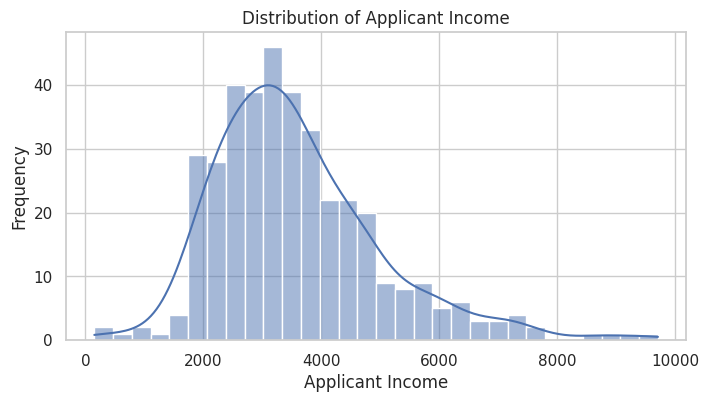


Chart for Loan Amount


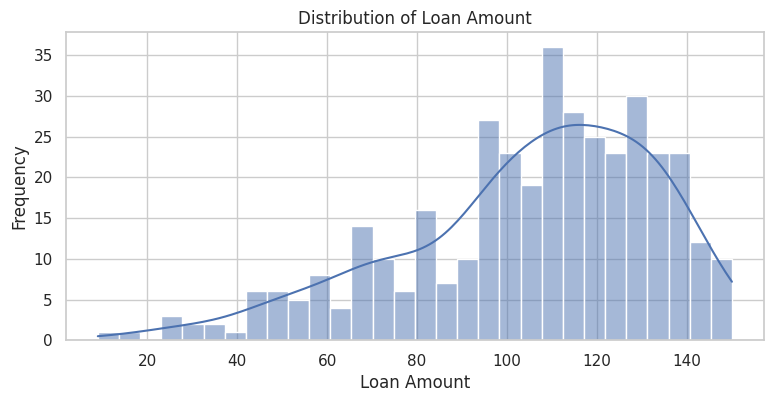

In [ ]:
# Plot for ApplicantIncome
print("Chart for Applicant Income")
plt.figure(figsize=(8, 4))
sns.histplot(df['ApplicantIncome'], kde=True, bins=30)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

print("\nChart for Loan Amount")
# Plot for LoanAmount
plt.figure(figsize=(9, 4))
sns.histplot(df['LoanAmount'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

For ApplicantIncome:
The distribution is right-skewed, meaning a small number of applicants have very high incomes. The majority of income values are concentrated on the lower end. There are potential outliers on the far right that could impact modeling.

Now for Loan Amount:
Also right-skewed, but less extreme than ApplicantIncome. Most loan amounts fall under a certain threshold, with a long tail of larger loans. Some unusually high values may be outliers.

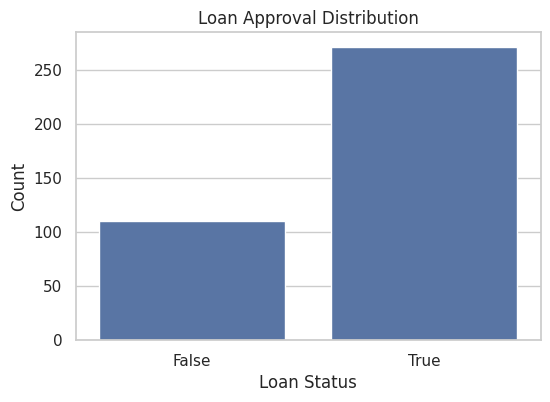

Loan Approval & Rejection Rates (%):
 Loan_Status_1
True     71.13
False    28.87
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Loan_Status_1')
plt.title('Loan Approval Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# calculating percentages
approval_percent = df['Loan_Status_1'].value_counts(normalize=True) * 100
print("Loan Approval & Rejection Rates (%):\n", approval_percent.round(2))

The bar chart shows that more loans are approved than rejected as the approval rate is 71.13% (True) while rejection rate is around 28.87% (False)

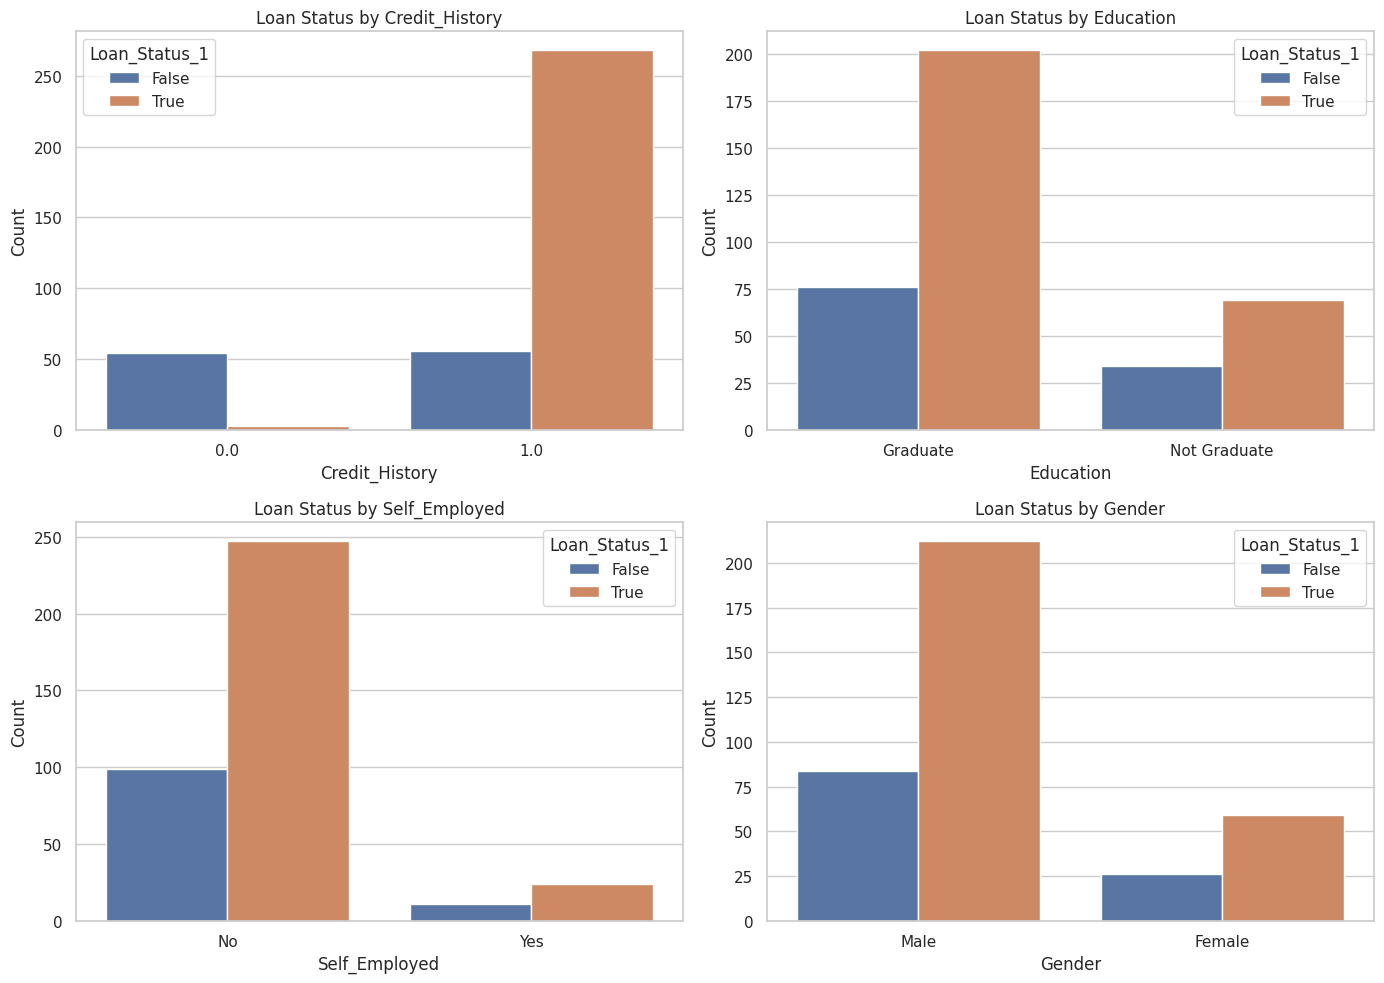

In [ ]:
categorical_features = ['Credit_History', 'Education', 'Self_Employed', 'Gender']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)  # 2x2 grid of subplots
    sns.countplot(x=feature, hue='Loan_Status_1', data=df)
    plt.title(f'Loan Status by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

1. Credit History
Applicants with a credit history of 1.0 (i.e., good credit history) have significantly higher loan approval rates compared to those with a credit history of 0.

2. Education
Both Graduates and Not Graduates have higher counts of approved loans (Loan_Status == True), but Graduates have noticeably more approvals.

3. Self_Employed
Loan approvals are much higher for non-self-employed individuals. Self-employed applicants have significantly fewer approvals and total applicants.

4. Gender
While males have more overall applications, both males and females have higher approvals than rejections. However, the male group shows a larger gap between approvals and rejections.

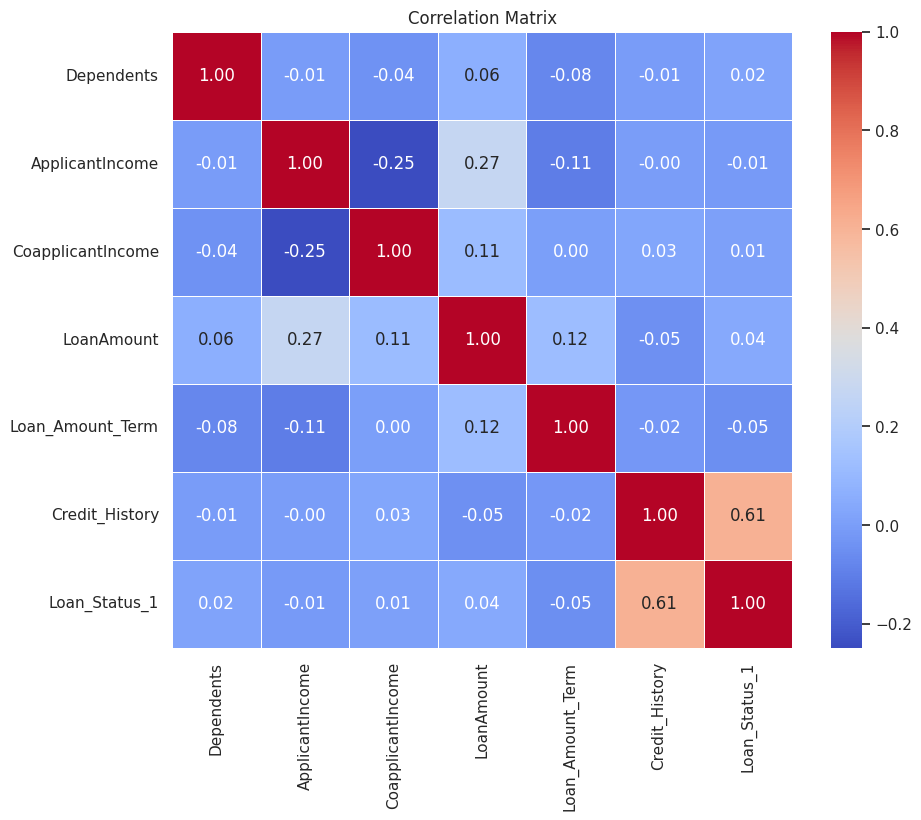

In [ ]:
df['Loan_Status_1'] = df['Loan_Status_1'].astype(int)
corr_matrix = df.corr(numeric_only=True)
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

1. Dependents: Shows a very weak negative correlation with ApplicantIncome  CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, and a very weak positive correlation with Loan_Status_1.
2. ApplicantIncome: Shows a weak negative correlation with Dependents (-0.01) and CoapplicantIncome (-0.25), a weak positive correlation with LoanAmount, a very weak negative correlation with Credit_History (-0.00), and a very weak negative correlation with Loan_Status_1 (-0.01).
3. LoanAmount: Shows a weak positive correlation with Dependents, ApplicantIncome, and CoapplicantIncome, a weak positive correlation with Loan_Amount_Term.

---

## 🤖 4. Logistic Regression Modeling

- Split dataset into training and testing sets.
- Train logistic regression model.
- Evaluate using confusion matrix and classification report.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X = df.drop(['Loan_Status_1'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Loan_Status_1']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 7 14]
 [ 0 56]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77



---

# 🎯 End of Finance Lab

Congratulations! You built and analyzed a logistic regression model for loan approval prediction based on real-world banking data.

Analysis Question Answers
1. What is the overall loan approval rate?

Ans: The overall loan approval rate is 71.13%
2. How does credit history affect loan approval?

Ans: The credit history affect loan approval of male and female not much
3. Does applicant income influence the chance of loan approval?

Ans: Mean Income (Approved): 3570.66
Mean Income (Rejected): 3602.47
Median Income (Approved): 3276.00
Median Income (Rejected): 3418.00

According to these figures yes the applicant income affects loan approval of make and female
4. Are graduates more likely to get their loans approved?

Ans: Loan Approval Rate by Education:
Graduate        72.661871,
Not Graduate    66.990291

Yes gradautes are more likely to get their Loans approved
5. Are self-employed applicants facing more loan rejections?

Ans: Loan Approval Distribution by Self Employment:
Loan_Status_1          0          1
Self_Employed                      
No             28.612717  71.387283
Yes            31.428571  68.571429

Yes the self empyeed applicants face more lan rejections (men face more as compared to women)